In [1]:
#Clean the data

In [1]:
import pandas as pd
import gzip
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_gz(gz):
    with gzip.open(str(gz)) as f:
        features_train = pd.read_csv(f, sep='\t')
    return features_train

In [6]:
def clean_df(source):
    source = source.drop(['hm_beta','hm_odds_ratio','hm_ci_lower','hm_ci_upper','standard_error','ci_lower','odds_ratio','beta','ci_upper'],axis=1)
    source = source.dropna()
    return source

In [4]:
source_one = read_gz('17463246-GCST000028-EFO_0001360.h.tsv.gz')
source_two = read_gz('29358691-GCST005413-GCST005413.h.tsv.gz')
source_three = read_gz('20081858-GCST000571-EFO_0004466.h (1).tsv.gz')
source_four = read_gz('31217584-GCST008048-EFO_0001360.h.tsv.gz')
source_five = read_gz('28490609-GCST004487-EFO_0008000.h.tsv.gz')

C:\Users\kelvi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
source_one = clean_df(source_one)
source_two = clean_df(source_two)
source_three = clean_df(source_three)
source_four = clean_df(source_four)
source_five = clean_df(source_five)

In [10]:
#Explore the data

In [11]:
source_one.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_effect_allele_frequency,hm_code,chromosome,base_pair_location,...,geno,geno_a,geno_u,p_hwd,p_hwd_a,p_hwd_u,f_miss,f_miss_a,f_miss_u,p_miss
9632,10_86232159_C_A,rs2607839,10,86232159.0,C,A,0.77060,11,10,86232159,...,154/1034/1741,76/517/869,78/517/872,0.9583,1.0000,0.8828,0.000682,0.001366,0.000000,0.15670
9633,10_3222452_G_T,rs7075005,10,3222452.0,G,T,0.48960,10,10,3222452,...,705/1431/731,356/717/352,349/714/379,0.9404,0.8323,0.7519,0.021836,0.026640,0.017040,0.07545
9634,10_24381925_A_G,rs7077294,10,24381925.0,A,G,0.36660,10,10,24381925,...,392/1370/1148,199/687/566,193/683/582,0.6333,0.6950,0.7780,0.007165,0.008197,0.006135,0.50820
9635,10_24245207_A_G,rs17504713,10,24245207.0,A,G,0.05078,10,10,24245207,...,9/292/2627,6/149/1306,3/143/1321,0.7118,0.4437,1.0000,0.001024,0.002049,0.000000,0.08279
9636,10_50875480_A_G,rs17591964,10,50875480.0,A,G,0.17480,10,10,50875480,...,87/802/2034,43/379/1039,44/423/995,0.4644,0.2408,1.0000,0.002729,0.002049,0.003408,0.48070


In [12]:
source_two.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_effect_allele_frequency,hm_code,variant_id,chromosome,base_pair_location,effect_allele,other_allele,effect_allele_frequency,n,p_value
0,10_125430575_G_A,rs3851565,10,125430575,G,A,0.1464,10,rs3851565,10,125430575,a,g,0.1464,66941.0,0.09903
1,10_68492986_ATAT_A,rs34275431,10,68492986,ATAT,A,0.0450,10,rs34275431,10,68492986,a,atat,0.0450,66941.0,0.38630
2,10_10224537_C_T,rs545488069,10,10224537,C,T,0.0056,10,rs545488069,10,10224537,t,c,0.0056,65814.0,0.47180
3,10_5624446_G_C,rs56243537,10,5624446,G,C,0.0508,5,rs56243537,10,5624446,c,g,0.0508,66940.9,0.57700
4,10_11799177_G_GCT,rs200131797,10,11799177,G,GCT,0.9721,11,rs200131797,10,11799177,g,gct,0.0279,66940.9,0.94730


In [13]:
source_three.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_beta,hm_effect_allele_frequency,hm_code,variant_id,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,chromosome,base_pair_location
0,10_10515910_G_T,rs1000039,10,10515910.0,G,T,-0.0052,0.027,10,rs1000039,t,g,0.027,-0.0052,0.0120,0.6553,10,10515910
1,10_89276520_T_C,rs1000107,10,89276520.0,T,C,0.0090,0.966,11,rs1000107,t,c,0.034,-0.0090,0.0180,0.6254,10,89276520
2,10_10812856_T_C,rs1000135,10,10812856.0,T,C,-0.0011,0.775,11,rs1000135,t,c,0.225,0.0011,0.0049,0.8254,10,10812856
3,10_52682791_T_C,rs1000218,10,52682791.0,T,C,0.0050,0.508,11,rs1000218,t,c,0.492,-0.0050,0.0051,0.3219,10,52682791
4,10_52682974_G_T,rs1000219,10,52682974.0,G,T,0.0056,0.416,10,rs1000219,t,g,0.416,0.0056,0.0052,0.2819,10,52682974


In [14]:
source_four.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_beta,hm_effect_allele_frequency,hm_code,chromosome,...,other_allele,effect_allele,effect_allele_frequency,n,n_cas,beta,standard_error,p_value,INFO-score,variant_id
0,10_14554_A_G,rs568182971,10,14554.0,A,G,-0.066478,0.006003,10,10,...,A,G,0.006003,45725,14042,-0.066478,0.118535,0.574915,0.658,rs568182971
1,10_14583_T_G,rs112920234,10,14583.0,T,G,-0.114315,0.004590,10,10,...,T,G,0.004590,45725,14042,-0.114315,0.141026,0.417598,0.592,rs112920234
2,10_14744_A_C,rs569167217,10,14744.0,A,C,-0.205263,0.013604,10,10,...,A,C,0.013604,45725,14042,-0.205263,0.090385,0.023148,0.649,rs569167217
3,10_14863_T_G,rs536478188,10,14863.0,T,G,-0.109624,0.011792,10,10,...,T,G,0.011792,45725,14042,-0.109624,0.098040,0.263502,0.516,rs536478188
4,10_15029_A_C,rs61838556,10,15029.0,A,C,0.008543,0.520964,11,10,...,C,A,0.479036,45725,14042,-0.008543,0.020794,0.681202,0.622,rs61838556


In [15]:
source_five.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_beta,hm_effect_allele_frequency,hm_code,variant_id,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,n,chromosome,base_pair_location
0,10_126652663_T_C,rs2366866,10,126652663.0,T,C,-0.0139,0.488,11,rs2366866,T,C,0.512,0.0139,0.0211,0.5117,4828,10,126652663
1,10_68758555_A_C,rs2490170,10,68758555.0,A,C,0.0009,0.716,11,rs2490170,A,C,0.284,-0.0009,0.0256,0.9715,4496,10,68758555
2,10_49362054_A_G,rs12763313,10,49362054.0,A,G,0.0035,0.056,11,rs12763313,A,G,0.944,-0.0035,0.0575,0.9516,4369,10,49362054
3,10_36634544_G_A,rs10827683,10,36634544.0,G,A,-0.0190,0.250,10,rs10827683,A,G,0.250,-0.0190,0.0259,0.4625,4828,10,36634544
4,10_43077502_A_G,rs12246855,10,43077502.0,A,G,-0.0136,0.682,11,rs12246855,A,G,0.318,0.0136,0.0279,0.6259,3473,10,43077502


In [16]:
print(source_one['effect_allele'].count())
print(source_two['effect_allele'].count())
print(source_three['effect_allele'].count())
print(source_four['effect_allele'].count())
print(source_five['effect_allele'].count())

389206
14292610
2435162
23817507
9694532


In [9]:
def create_histogram(source,nbins):
    return source['p_value'].hist(bins=nbins)

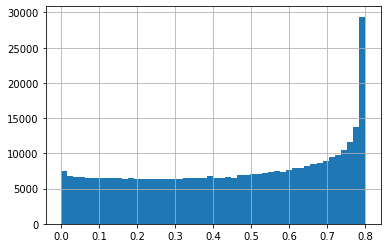

In [10]:
create_histogram(source_one,50)

P-values may have already been corrected for multiple testing, for example using the Bonferroni correction. We might have to look at the original p-value to see if the data is good.

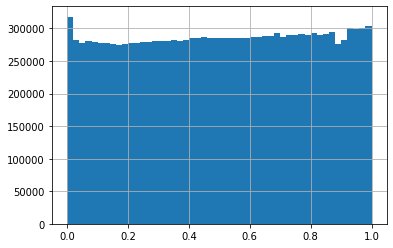

In [11]:
create_histogram(source_two,50)

All our hypotheses were null. This does not mean they actually are all null! It does mean that
At most a small percentage of hypotheses are non-null. An FDR correction method such as Benjamini-Hochberg will let you identify those.

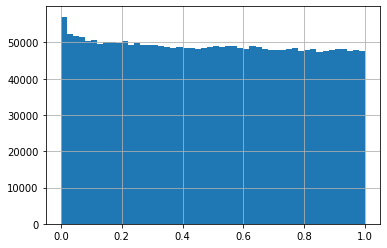

In [12]:
create_histogram(source_three,50)

All our hypotheses were null. This does not mean they actually are all null! It does mean that
At most a small percentage of hypotheses are non-null. An FDR correction method such as Benjamini-Hochberg will let you identify those.

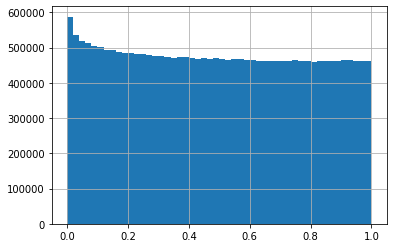

In [13]:
create_histogram(source_four,50)

All our hypotheses were null. This does not mean they actually are all null! It does mean that
At most a small percentage of hypotheses are non-null. An FDR correction method such as Benjamini-Hochberg will let you identify those.

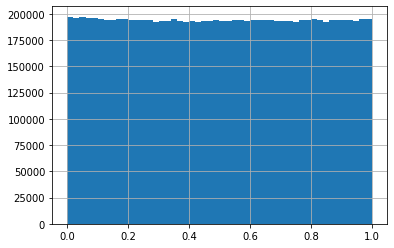

In [14]:
create_histogram(source_five,50)

All our hypotheses were null. This does not mean they actually are all null! It does mean that
At most a small percentage of hypotheses are non-null. An FDR correction method such as Benjamini-Hochberg will let you identify those.

In [18]:
def manhattan_plot(source, height):
    plot_one = source[['p_value','chromosome']]
    plot_one['minuslog10pvalue'] = -np.log10(plot_one.p_value)
    plot_one.chromosome = plot_one.chromosome.astype('category')
    plot_one = plot_one.sort_values('chromosome')
    plot_one['ind'] = range(len(plot_one))
    plot_one_grouped = plot_one.groupby(('chromosome'))
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)
    colors = ['red','green','blue', 'yellow']
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(plot_one_grouped):
        group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num % len(colors)], ax=ax)
        x_labels.append(name)
        x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([0, len(plot_one)])
    ax.set_ylim([0, height])
    ax.set_xlabel('Chromosome')

C:\Users\kelvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


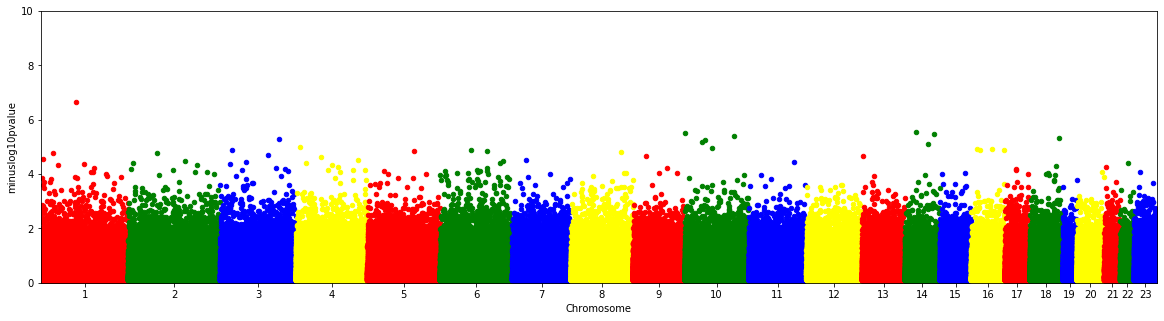

In [19]:
manhattan_plot(source_one, 10)

On the x axis is the shows haplotypes from each region of the DNA that is tested. It is orgnaized by chromosome.
Each dot is a haplotype in the DNA. Each verticle line cover the same genetic variation. 
The y axis represents the frequency of the haplotype of that region. The higher the peak the stronger the association with 
the trait. The experiement is testing whether the gene is associated with the disease. This specific graph shows that chromosome one has an association with T2D

C:\Users\kelvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


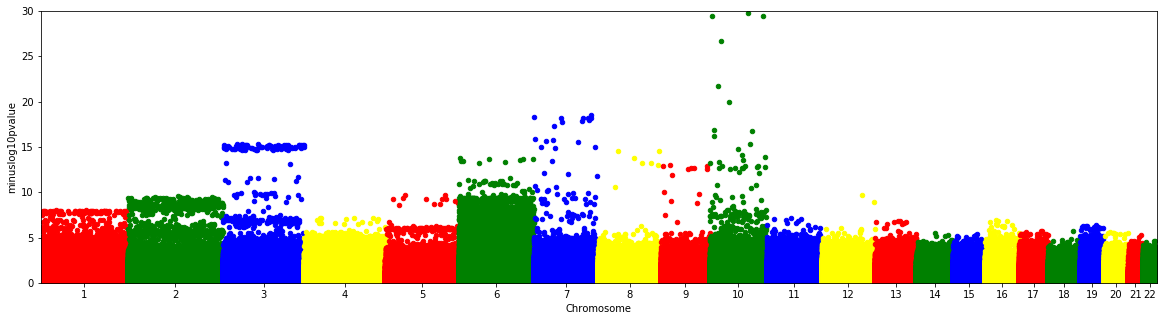

In [20]:
manhattan_plot(source_two,30)

This graph shows that chromosome 7 and 10 are associated with type two diabetes

C:\Users\kelvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


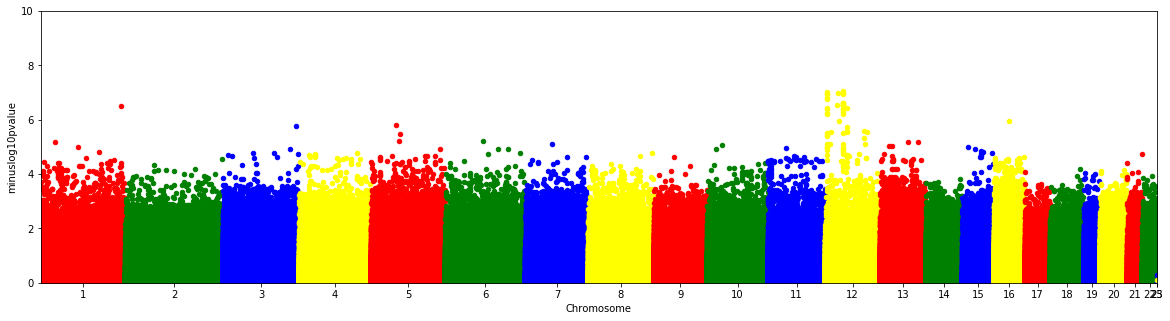

In [21]:
manhattan_plot(source_three,10)

This graph shows that chromosome one and twelve are associated with type two diabetes

C:\Users\kelvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


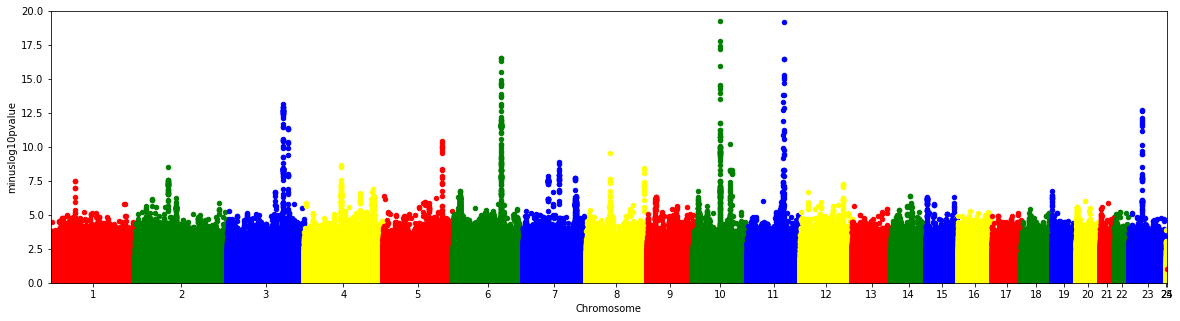

In [24]:
manhattan_plot(source_four,20)

The graph shows that chromosome 3,6,10,11, and 23 are associated with type two diabetes.

C:\Users\kelvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


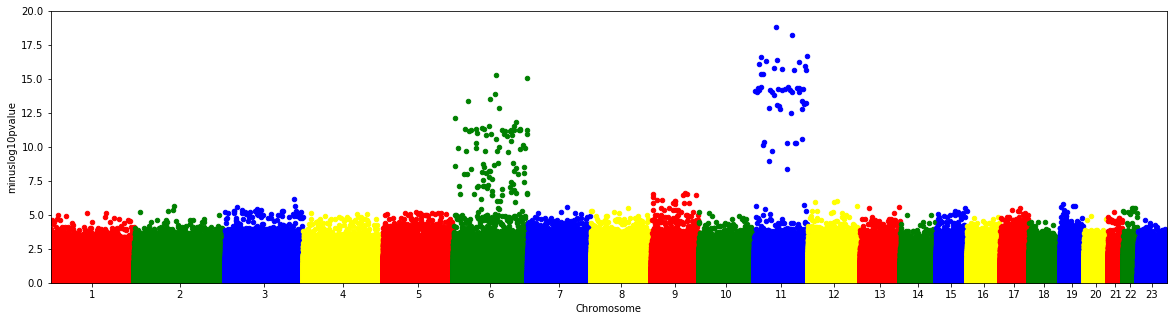

In [25]:
manhattan_plot(source_five,20)

The graph shows that chromosome six and eleven are associated with type two diabetes.